# DAY 16 Neural Network(Artificial Neural Network)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as mns
%matplotlib inline

In [44]:
df_loan = pd.read_csv('df1_loan.csv')
df_loan.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,"$5,849.00"
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,"$6,091.00"
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,"$3,000.00"
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,"$4,941.00"
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,"$6,000.00"


In [45]:
df_loan.rename({'Unnamed: 0':'M'},axis = 1,inplace =True)

In [46]:
df_loan.drop('M',axis = 1,inplace =True)

In [47]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,"$5,849.00"
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,"$6,091.00"
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,"$3,000.00"
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,"$4,941.00"
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,"$6,000.00"


In [48]:
df_loan.shape

(500, 14)

In [49]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            500 non-null    object 
 1   Gender             491 non-null    object 
 2   Married            497 non-null    object 
 3   Dependents         488 non-null    object 
 4   Education          500 non-null    object 
 5   Self_Employed      473 non-null    object 
 6   ApplicantIncome    500 non-null    int64  
 7   CoapplicantIncome  500 non-null    float64
 8   LoanAmount         482 non-null    float64
 9   Loan_Amount_Term   486 non-null    float64
 10  Credit_History     459 non-null    float64
 11  Property_Area      500 non-null    object 
 12  Loan_Status        500 non-null    object 
 13  Total_Income       500 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 54.8+ KB


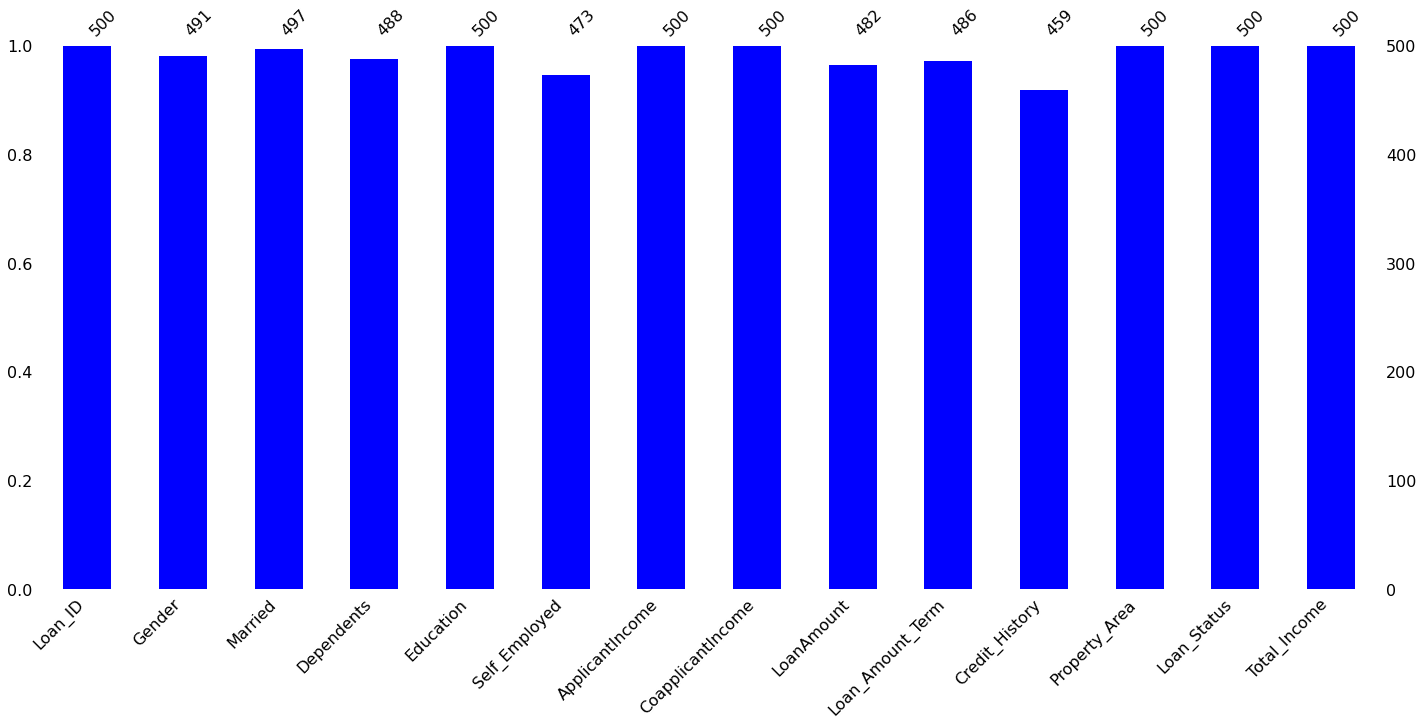

In [50]:
mns.bar(df_loan,color = 'blue')

# Filling in the missing Values

In [51]:
df_loan['LoanAmount']= df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].dropna().median())
df_loan['Gender']= df_loan['Gender'].fillna(df_loan['Gender'].dropna().mode().values[0])
df_loan['Loan_Amount_Term']= df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].dropna().mode().values[0])
df_loan['Credit_History']= df_loan['Credit_History'].fillna(df_loan['Credit_History'].dropna().mode().values[0])
df_loan['Dependents']= df_loan['Dependents'].fillna(df_loan['Dependents'].dropna().mode().values[0])
df_loan['Married']= df_loan['Married'].fillna(df_loan['Married'].dropna().mode().values[0])
df_loan['Self_Employed']= df_loan['Self_Employed'].fillna(df_loan['Self_Employed'].dropna().mode().values[0])

In [52]:
df_loan['Dependents'].value_counts()

0     300
1      81
2      79
3+     40
Name: Dependents, dtype: int64

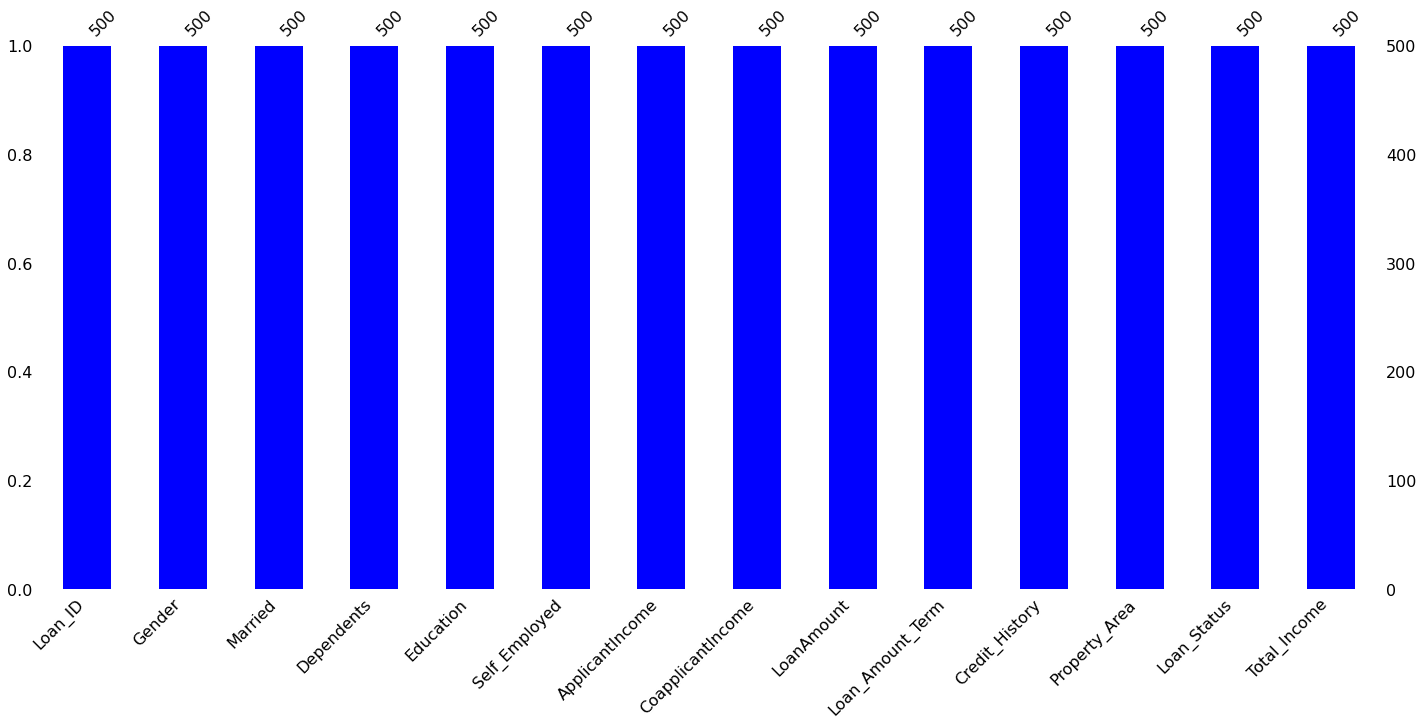

In [53]:
mns.bar(df_loan,color = 'blue')

# Perform Exploratory Data Analysis on the dataset to check how the following against the loan status
#Gender
#Married
#Self_Employed
#Credit history
#property_Area
#LoanAmount

In [54]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            500 non-null    object 
 1   Gender             500 non-null    object 
 2   Married            500 non-null    object 
 3   Dependents         500 non-null    object 
 4   Education          500 non-null    object 
 5   Self_Employed      500 non-null    object 
 6   ApplicantIncome    500 non-null    int64  
 7   CoapplicantIncome  500 non-null    float64
 8   LoanAmount         500 non-null    float64
 9   Loan_Amount_Term   500 non-null    float64
 10  Credit_History     500 non-null    float64
 11  Property_Area      500 non-null    object 
 12  Loan_Status        500 non-null    object 
 13  Total_Income       500 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 54.8+ KB


Text(0.5, 1.0, 'THE GRAPH BELOW SHOWS THE EXPLORATORY DATA ANALYSIS OF LOAN STATUS TO GENDER')

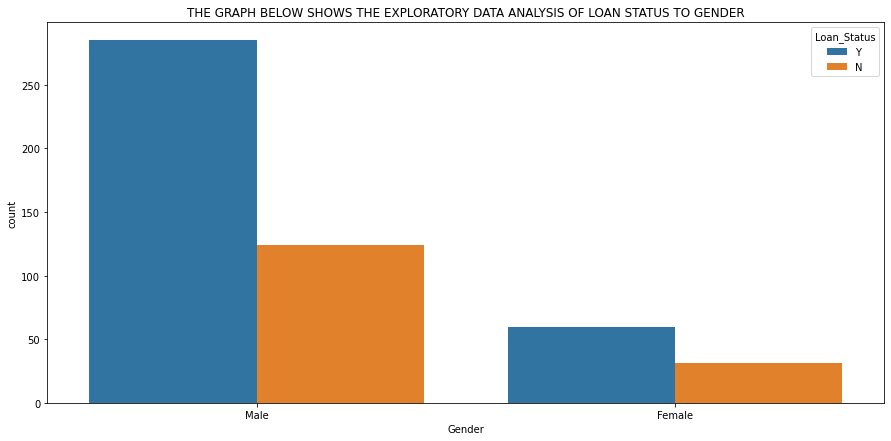

In [57]:
countplt,ax = plt.subplots(figsize =(15,7))
sns.countplot(x='Gender',hue =df_loan['Loan_Status'],data = df_loan)
plt.title('THE GRAPH BELOW SHOWS THE EXPLORATORY DATA ANALYSIS OF LOAN STATUS TO GENDER')

In [58]:
df_loan['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

For NO bar,the blue represents the people who are Married and orange for those who are Not Marred,while
For YES bar,the blue represents the people who are Married and orange for those who are Not Married


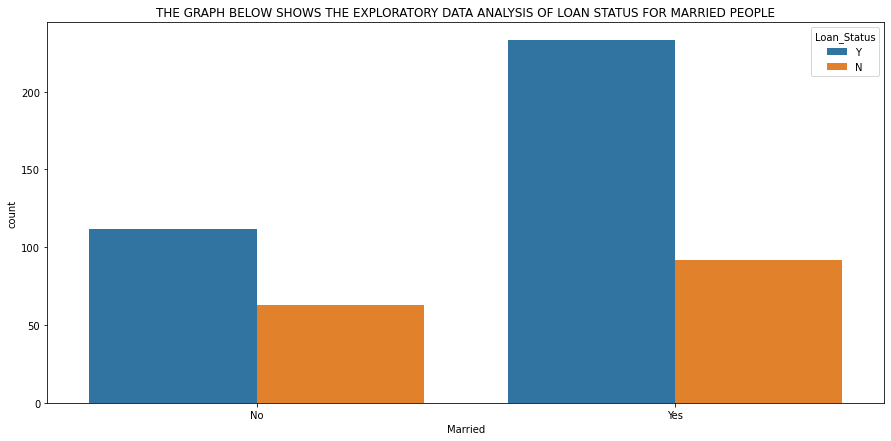

In [61]:
countplt,ax = plt.subplots(figsize =(15,7))
sns.countplot(x='Married',hue =df_loan['Loan_Status'],data = df_loan)
plt.title('THE GRAPH BELOW SHOWS THE EXPLORATORY DATA ANALYSIS OF LOAN STATUS FOR MARRIED PEOPLE')
print('For NO bar,the blue represents the people who are Married and orange for those who are Not Marred,while\nFor YES bar,the blue represents the people who are Married and orange for those who are Not Married')

For NO bar,the blue represents the people who are not eligible for loan and orange for those who are eligible for loan,while
For YES bar,the blue represents the people who are not eligible for loan and orange for those who are eligible for loan


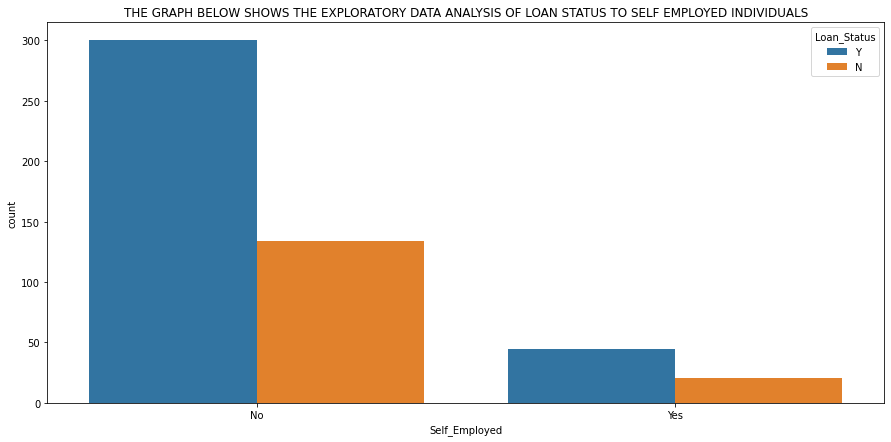

In [62]:
countplt,ax = plt.subplots(figsize =(15,7))
sns.countplot(x= 'Self_Employed', hue =df_loan['Loan_Status'],data = df_loan)
plt.title('THE GRAPH BELOW SHOWS THE EXPLORATORY DATA ANALYSIS OF LOAN STATUS TO SELF EMPLOYED INDIVIDUALS')
print('For NO bar,the blue represents the people who are not eligible for loan and orange for those who are eligible for loan,while\nFor YES bar,the blue represents the people who are not eligible for loan and orange for those who are eligible for loan')

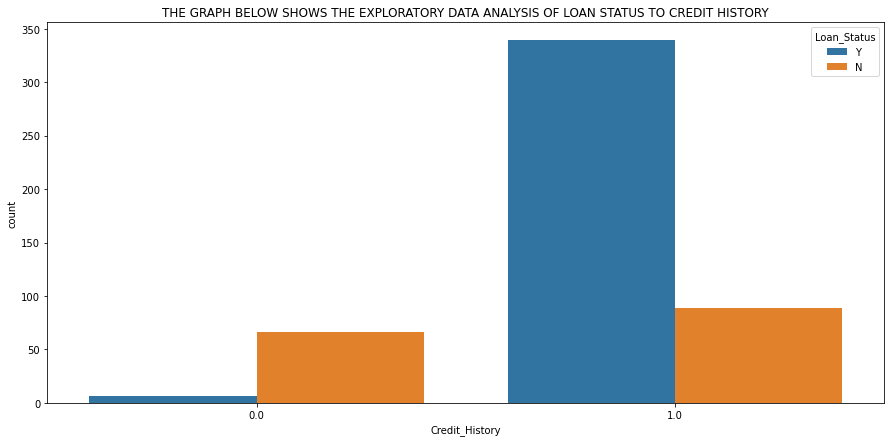

In [64]:
countplt,ax = plt.subplots(figsize =(15,7))
sns.countplot(x='Credit_History',hue =df_loan['Loan_Status'],data = df_loan)
plt.title('THE GRAPH BELOW SHOWS THE EXPLORATORY DATA ANALYSIS OF LOAN STATUS TO CREDIT HISTORY')
plt.show()

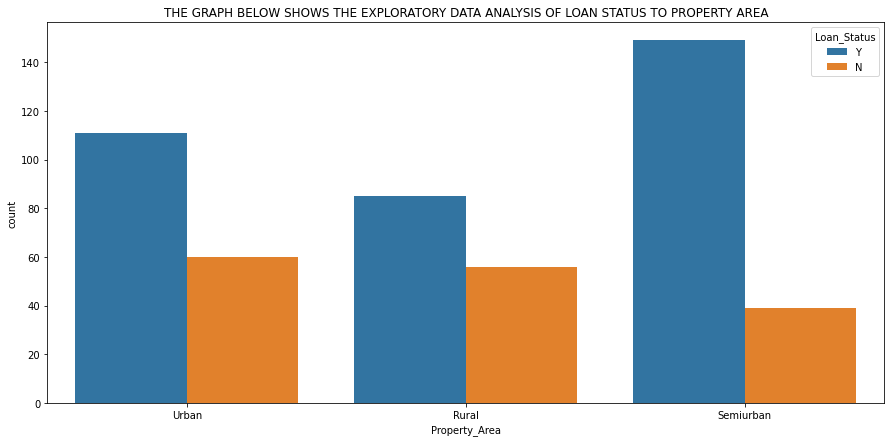

In [65]:
countplt,ax = plt.subplots(figsize =(15,7))
sns.countplot(x='Property_Area',hue =df_loan['Loan_Status'],data = df_loan)
plt.title('THE GRAPH BELOW SHOWS THE EXPLORATORY DATA ANALYSIS OF LOAN STATUS TO PROPERTY AREA')
plt.show()

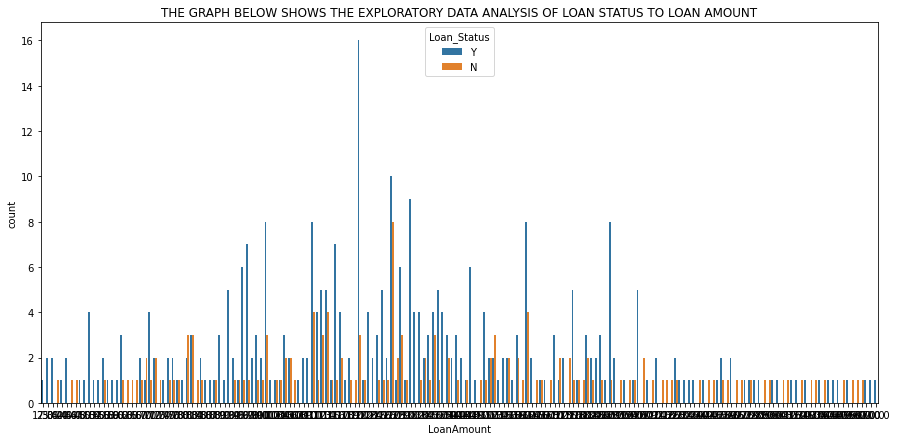

In [66]:
countplt,ax = plt.subplots(figsize =(15,7))
sns.countplot(x='LoanAmount',hue =df_loan['Loan_Status'],data = df_loan)
plt.title('THE GRAPH BELOW SHOWS THE EXPLORATORY DATA ANALYSIS OF LOAN STATUS TO LOAN AMOUNT')
plt.show()

# Perform Eploratory analysis on the dataset to check how the following agains the gender and married against Applicant income

C:\Users\ILOZUE\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Males generally have the highest income . Explicitly,males that are married have gereater income than unmarried male


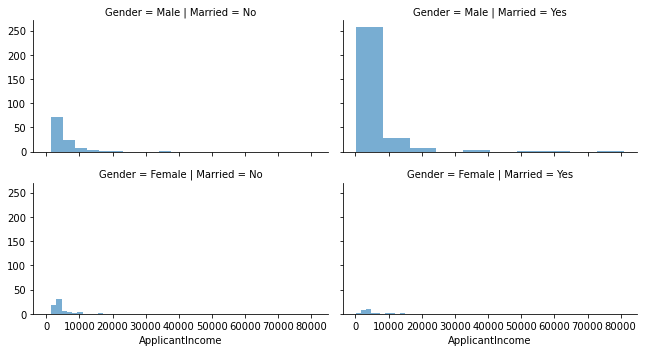

In [20]:
grid = sns.FacetGrid(df_loan,row = 'Gender',col = 'Married',size =2.5,aspect = 1.8)
grid.map(plt.hist,'ApplicantIncome',alpha =.6,bins = 10)
grid.add_legend()
print('Males generally have the highest income . Explicitly,males that are married have gereater income than unmarried male')

# Perform Eploratory analysis on the dataset to check how the following agains the Education and married against Applicant income

C:\Users\ILOZUE\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


The graph shows that Graduates tends to get married easily compared to Non Graduates


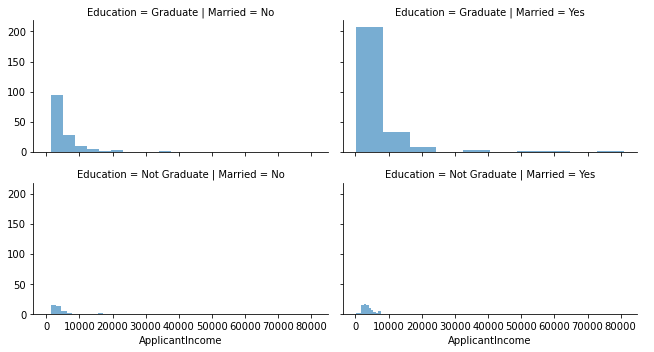

In [67]:
grid = sns.FacetGrid(df_loan,row = 'Education',col = 'Married',size =2.5,aspect = 1.8)
grid.map(plt.hist,'ApplicantIncome',alpha =.6,bins = 10)
grid.add_legend()
print('The graph shows that Graduates tends to get married easily compared to Non Graduates')

# Perform Eploratory analysis on the dataset to check how the following agains the gender and Eduction against Applicant income

This shows that Males are more educated and are graduate compared to Females who are less Educated and are Non graduates


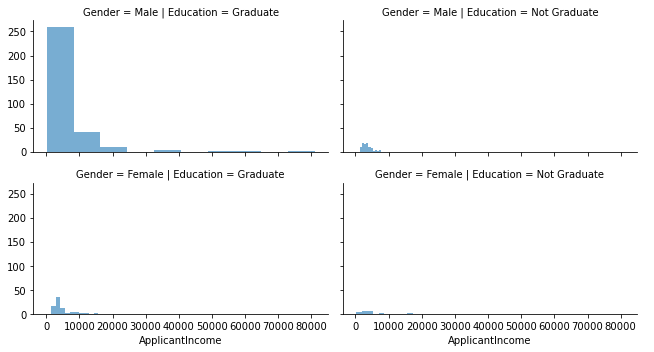

In [68]:
grid = sns.FacetGrid(df_loan,row = 'Gender',col = 'Education',size =2.5,aspect = 1.8)
grid.map(plt.hist,'ApplicantIncome',alpha =.6,bins = 10)
grid.add_legend()
print('This shows that Males are more educated and are graduate compared to Females who are less Educated and are Non graduates')

# Perform Eploratory analysis on the dataset to check how the following agains the self employed and Education against Applicant income

This simply shows that those who are not self employed tends to concentrate more in Education and graduate easily in School


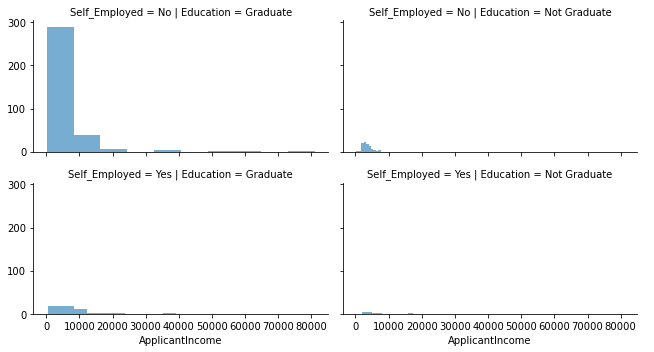

In [69]:
grid = sns.FacetGrid(df_loan,row = 'Self_Employed',col = 'Education',size =2.5,aspect = 1.8)
grid.map(plt.hist,'ApplicantIncome',alpha =.6,bins = 10)
grid.add_legend()
print('This simply shows that those who are not self employed tends to concentrate more in Education and graduate easily in School')

# Perform Eploratory analysis on the dataset to check how the following agains the self employed and dependents against Applicant income

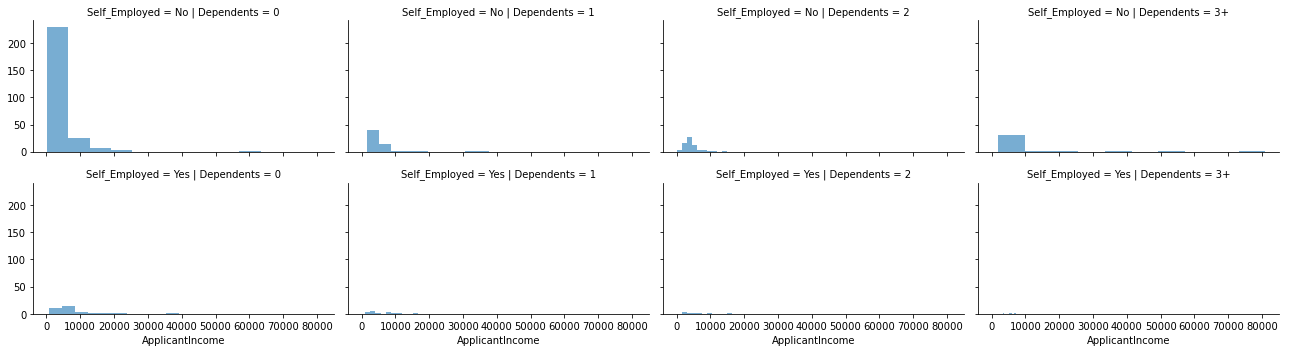

In [70]:
grid = sns.FacetGrid(df_loan,row = 'Self_Employed',col = 'Dependents',size =2.5,aspect = 1.8)
grid.map(plt.hist,'ApplicantIncome',alpha =.6,bins = 10)
grid.add_legend()
plt.show()

# Predict the dataset using the MPL Classifier algorithm to check how the independent variable effect the dependent variable

In [25]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.5,360.0,1.0,Urban,Y,"$5,849.00"
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,"$6,091.00"
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,"$3,000.00"
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,"$4,941.00"
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,"$6,000.00"


In [26]:
df_loan.drop('Loan_ID',axis = 1,inplace = True)

In [27]:
df_loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [28]:
#df_loan[df_loan.Total_Income[:13]]= df_loan[df_loan.Total_Income[1:]].replace('[\$,]','', regex = True).astype(float)

In [29]:
import locale
locale.setlocale(locale.LC_ALL,'')
df_loan['Total_Income'] = df_loan.Total_Income.map(lambda x: locale.atof(x.strip('$')))

In [30]:
Categorical = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for car in Categorical:
    df_loan[car] = enc.fit_transform(df_loan[car])

In [31]:
x = df_loan.drop('Loan_Status',axis = 1)
y = df_loan['Loan_Status']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =1)

In [33]:
from sklearn.neural_network import MLPClassifier
regmodel = MLPClassifier(activation='tanh' )
regmodel.fit(x_train,y_train)

MLPClassifier(activation='tanh')

In [34]:
regmodel.score(x_test,y_test)

0.73

In [35]:
pred = regmodel.predict(x_test)
pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype='<U1')

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        27
           Y       0.73      1.00      0.84        73

    accuracy                           0.73       100
   macro avg       0.36      0.50      0.42       100
weighted avg       0.53      0.73      0.62       100



C:\Users\ILOZUE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print(confusion_matrix(y_test,pred))

[[ 0 27]
 [ 0 73]]
